In [23]:
import os
import re

import matplotlib.pyplot as plt
import squidpy as sq
import scanpy as sc
import pandas as pd
import numpy as np
import tifffile
import yaml

import mushroom.utils as utils

In [18]:
metadata = yaml.safe_load(open('/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/metadata.yaml'))
metadata

{'HT112C1': {'data': {'visium': {'HT112C1-U1': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT112C1/s0_visium.h5ad',
    'HT112C1-U2': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT112C1/s1_visium.h5ad'}},
  'ids': ['s0', 's1'],
  'order': ['HT112C1-U1', 'HT112C1-U2'],
  'registered_pixels_per_micron': 2.480402478562179,
  'scale': 0.1},
 'HT206B1': {'data': {'visium': {'HT206B1-U2': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT206B1/s0_visium.h5ad',
    'HT206B1-U3': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT206B1/s1_visium.h5ad',
    'HT206B1-U4': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT206B1/s2_visium.h5ad',
    'HT206B1-U5': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT206B1/s3_visium.h5ad'}},
  'ids': ['s0', 's1', 's2', 's3'],
  'order': ['HT206B1-U2', 'HT206B1-U3', 'HT206B1-U4', '

In [3]:
print('case', 'num_slides')
for case, data in metadata.items():
    print(case, len(data['order']))

case num_slides
HT112C1 2
HT206B1 4
HT225C1 5
HT226C1 2
HT235B1 2
HT243B1-H3 4
HT243B1-H4 2
HT268B1 5
HT271B1 4
HT339B1 2
HT397B1 6
HT413C1 3
HT448C1 2


In [47]:
def display_registration(ids, fps, color=None, alpha_img=0.):
    fig, axs = plt.subplots(ncols=len(fps))
    for sid, fp, ax in zip(ids, fps, axs):
        adata = sc.read_h5ad(fp)
        d = next(iter(adata.uns['spatial'].values()))
        scale = d['scalefactors']['tissue_hires_scalef']
        h, w = int(d['images']['hires'].shape[0] / scale), int(d['images']['hires'].shape[1] / scale)
        ax = sc.pl.spatial(
            adata, color=color, alpha_img=alpha_img, ax=ax, show=False, title=sid,
            colorbar_loc=None, crop_coord=(0, w, 0, h))[0]
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')
        

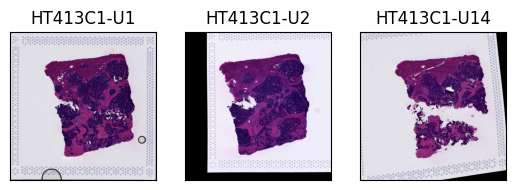

In [48]:
data = metadata['HT413C1']
fps = [data['data']['visium'][data['order'][data['ids'].index(sid)]]
       for sid in data['ids']]
display_registration(data['order'], fps, color=None, alpha_img=1.)

['HT112C1-U1', 'HT112C1-U2']


/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


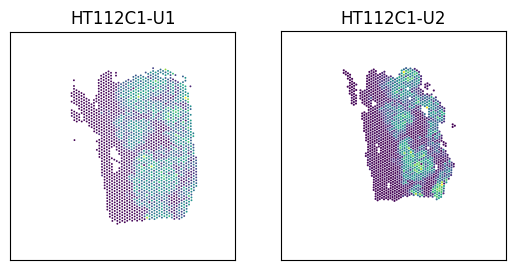

['HT206B1-U2', 'HT206B1-U3', 'HT206B1-U4', 'HT206B1-U5']


/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-

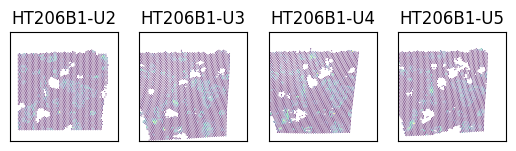

['HT225C1-U1', 'HT225C1-U2', 'HT225C1-U3', 'HT225C1-U4', 'HT225C1-U5']


/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-

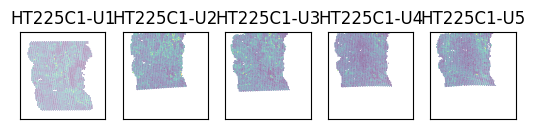

['HT226C1-U1', 'HT226C1-U2']


/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


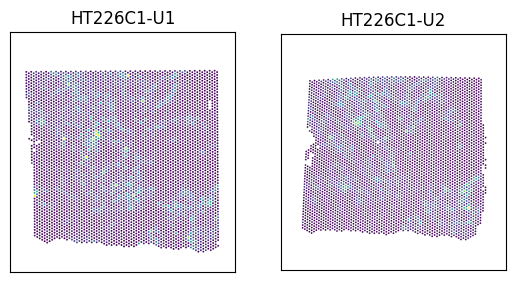

['HT235B1-U1', 'HT235B1-U2']


/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


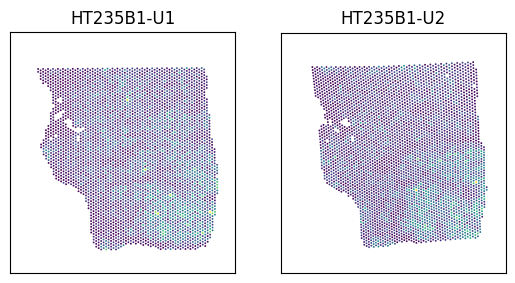

['HT243B1-H3-U1', 'HT243B1-H3-U2', 'HT243B1-H3-U3', 'HT243B1-H3-U4']


/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-

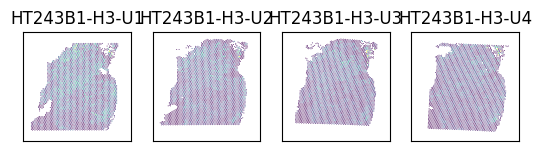

['HT243B1-H4-U1', 'HT243B1-H4-U2']


/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


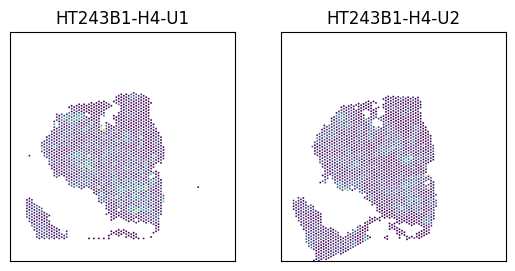

['HT268B1-U1', 'HT268B1-U2', 'HT268B1-U12', 'HT268B1-U22', 'HT268B1-U32']


/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-

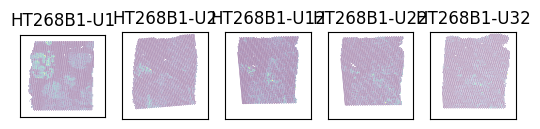

['HT271B1-U1', 'HT271B1-U2', 'HT271B1-U3', 'HT271B1-U4']


/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-

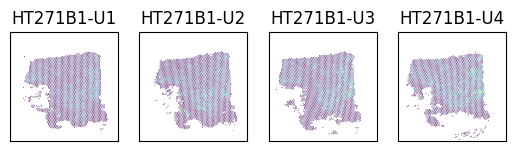

['HT339B1-U1', 'HT339B1-U2']


/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


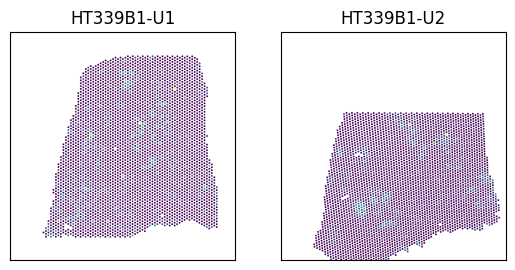

['HT397B1-U1', 'HT397B1-U21']


/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


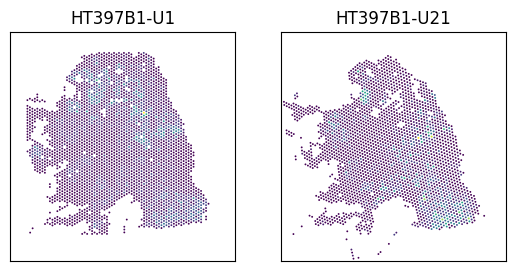

['HT413C1-U1', 'HT413C1-U2', 'HT413C1-U14']


/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


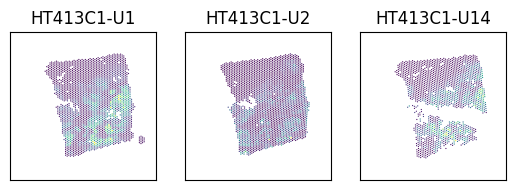

['HT448C1-U1', 'HT448C1-U13']


/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


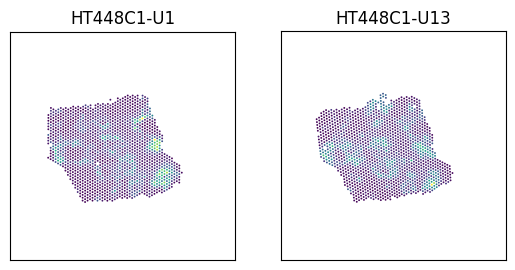

In [52]:
for case, data in metadata.items():
    order = [data['order'][data['ids'].index(sid)]
             for sid in data['ids'] if data['order'][data['ids'].index(sid)] in data['data']['visium']]
    fps = [data['data']['visium'][sample] for sample in order]
    display_registration(order, fps, color='EPCAM')
    plt.show()

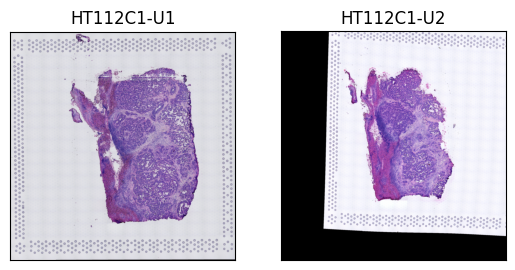

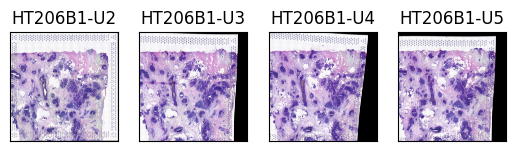

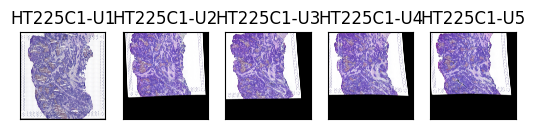

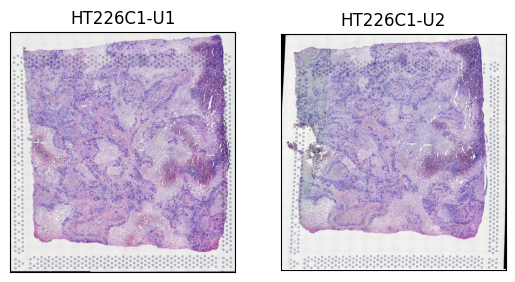

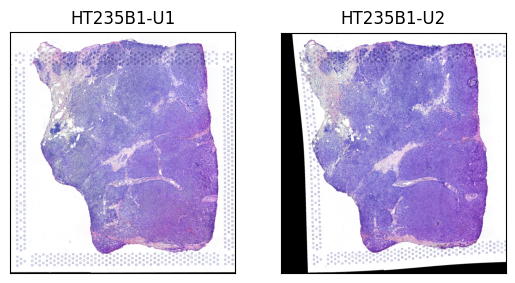

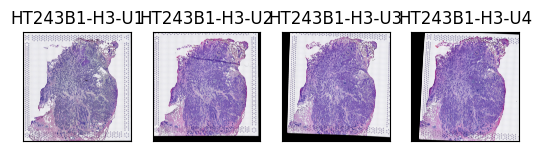

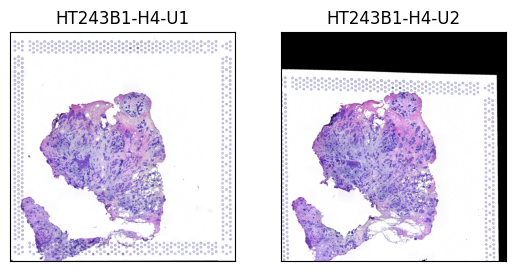

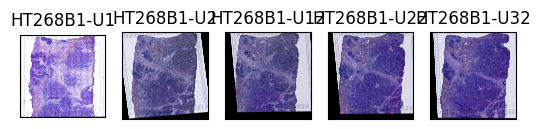

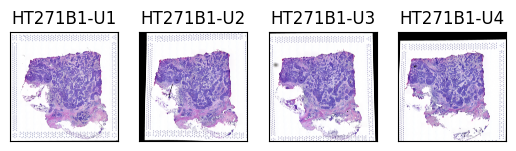

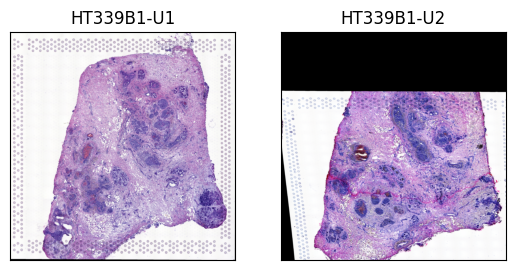

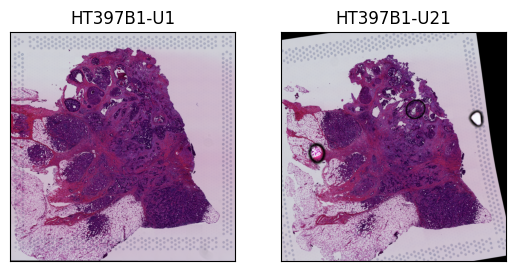

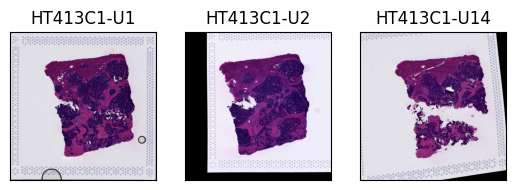

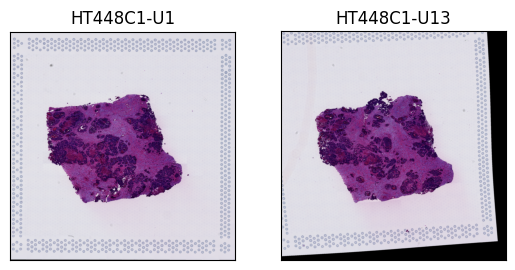

In [53]:
for case, data in metadata.items():
    order = [data['order'][data['ids'].index(sid)]
             for sid in data['ids'] if data['order'][data['ids'].index(sid)] in data['data']['visium']]
    fps = [data['data']['visium'][sample] for sample in order]
    display_registration(order, fps, color=None, alpha_img=1.)
    plt.show()

In [116]:
# for case, data in metadata.items():
#     for sample in data['order']:
#         print(f"'{sample}': '',")

In [4]:
mapping = {
    'HT112C1-U1': 'HT112C1-U1_ST_Bn1',
    'HT112C1-U2': 'HT112C1-U2_ST_Bn1',
    'HT206B1-U2': 'HT206B1-S1Fc1U2Z1B1',
    'HT206B1-U3': 'HT206B1-S1Fc1U3Z1B1',
    'HT206B1-U4': 'HT206B1-S1Fc1U4Z1B1',
    'HT206B1-U5': 'HT206B1-S1Fc1U5Z1B1',
    'HT225C1-U1': 'HT225C1-Th1Fc1U1Z1B1',
    'HT225C1-U2': 'HT225C1-Th1Fc1U2Z1B1',
    'HT225C1-U3': 'HT225C1-Th1Fc1U3Z1B1',
    'HT225C1-U4': 'HT225C1-Th1Fc1U4Z1B1',
    'HT225C1-U5': 'HT225C1-Th1Fc1U5Z1B1',
    'HT226C1-U1': 'HT226C1-Th1Fc1U1Z1Bn1',
    'HT226C1-U2': 'HT226C1-Th1Fc1U2Z1Bn1',
    'HT235B1-U1': 'HT235B1-S1Fc1U1Z1Bn1',
    'HT235B1-U2': 'HT235B1-S1Fc1U2Z1Bn1',
    'HT243B1-H3-U1': 'HT243B1H3A2-S1Fc1U1Z1B1',
    'HT243B1-H3-U2': 'HT243B1H3A2-S1Fc1U2Z1B1',
    'HT243B1-H3-U3': 'HT243B1H3A2-S1Fc1U3Z1B1',
    'HT243B1-H3-U4': 'HT243B1H3A2-S1Fc1U4Z1B1',
    'HT243B1-H4-U1': 'HT243B1H4A2-S1Fc1U1Z1B1',
    'HT243B1-H4-U2': 'HT243B1H4A2-S1Fc1U2Z1B1',
    'HT268B1-U1': 'HT268B1-Th1K3Fc2U1Z1Bs1',
    'HT268B1-U2': 'HT268B1-Th1H3Fc2U2Z1Bs1',
    'HT268B1-U12': 'HT268B1-Th1H3Fc2U12Z1Bs1',
    'HT268B1-U22': 'HT268B1-Th1H3Fc2U22Z1Bs1',
    'HT268B1-U32': 'HT268B1-Th1H3Fc2U32Z1Bs1',
    'HT271B1-U1': 'HT271B1-S1H3Fc2U1Z1Bs1',
    'HT271B1-U2': 'HT271B1-S1H3Fc2U2Z1Bs1',
    'HT271B1-U3': 'HT271B1-S1H3Fc2U3Z1Bs1',
    'HT271B1-U4': 'HT271B1-S1H3Fc2U4Z1Bs1',
    'HT339B1-U1': 'HT339B1-S1H3Fc2U1Z1Bs1',
    'HT339B1-U2': 'HT339B1-S1H3Fc2U2Bs2',
    'HT397B1-U1': 'HT397B1-S1H3A1U1Bp1',
    'HT397B1-U21': 'HT397B1-S1H3A1U21Bp1',
    'HT413C1-U1': 'HT413C1-Th1K2A4U1Bp1',
    'HT413C1-U2': 'HT413C1-Th1K2A4U2Bp1',
    'HT413C1-U14': 'HT413C1-Th1K2A4U14Bp1',
    'HT448C1-U1': 'HT448C1-Th1K1Fp1U1Bp1',
    'HT448C1-U13': 'HT448C1-Th1K1Fp1U13Bp1',
}
r_mapping = {v:k for k, v in mapping.items()}

In [5]:
df = pd.read_csv(
    '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/annotations/ST_microregion_Discover_Validation_cohort_2023 - Sample_level.tsv',
    sep='\t'
)
df['sample_id'] = [r_mapping.get(x, None) for x in df['LibraryName']]
df

LibraryName Study_cohort sample_type_tumor QCstatus  CqValue  \
0      HT112C1-U1_ST_Bn1    Discovery        Metastasis     PASS    12.84   
1      HT112C1-U2_ST_Bn1    Discovery        Metastasis     PASS    13.48   
2    HT206B1-S1Fc1U2Z1B1    Discovery           Primary     PASS    13.60   
3    HT206B1-S1Fc1U3Z1B1    Discovery           Primary     PASS    14.06   
4    HT206B1-S1Fc1U4Z1B1    Discovery           Primary     PASS    14.30   
..                   ...          ...               ...      ...      ...   
108    WUR120-A2Fs1U1Bp1   Validation           Primary     PASS    15.26   
109    WUR191-A1Fs1U1Bp1   Validation           Primary     PASS    13.53   
110    WUR232-A2Fs1U1Bp1   Validation           Primary     PASS    13.18   
111    WUR238-A3Fs1U1Bp1   Validation           Primary     PASS    14.33   
112    WUR239-A1Fs1U1Bp1   Validation           Primary     PASS    13.86   

    Sample_id_orig AssayType species  case_id piece_id  ...  \
0            112C1       OCT   Human  HT112C1       H1  ...   
1            112C1       OCT   Human  HT112C1       H1  ...   
2            206B1       OCT   Human  HT206B1       H1  ...   
3            206B1       OCT   Human  HT206B1       H1  ...   
4            206B1       OCT   Human  HT206B1       H1  ...   
..             ...       ...     ...      ...      ...  ...   
108      WUR120-A2      FFPE   Human   WUR120       A2  ...   
109      WUR191-A1      FFPE   Human   WUR191       A1  ...   
110      WUR232-A2      FFPE   Human   WUR232       A2  ...   
111      WUR238-A3      FFPE   Human   WUR238       A3  ...   
112      WUR239-A1      FFPE   Human   WUR239       A1  ...   

                                       AnnotationFinal  \
0    /diskmnt/Projects/Users/lfulghum/subclone_anno...   
1    /diskmnt/Projects/Users/lfulghum/subclone_anno...   
2    /diskmnt/Projects/Users/slivingston/revised_an...   
3    /diskmnt/Projects/Users/slivingston/revised_an...   
4    /diskmnt/Projects/Users/slivingston/revised_an...   
..                                                 ...   
108                                                NaN   
109                                                NaN   
110                                                NaN   
111                                                NaN   
112                                                NaN   

                                           MorphOutput  \
0    /diskmnt/Projects/Users/andretargino/Draft/and...   
1    /diskmnt/Projects/Users/andretargino/Draft/and...   
2    /diskmnt/Projects/Users/andretargino/Draft/and...   
3    /diskmnt/Projects/Users/andretargino/Draft/and...   
4    /diskmnt/Projects/Users/andretargino/Draft/and...   
..                                                 ...   
108  /diskmnt/Projects/Users/andretargino/Draft/and...   
109  /diskmnt/Projects/Users/andretargino/Draft/and...   
110  /diskmnt/Projects/Users/andretargino/Draft/and...   
111  /diskmnt/Projects/Users/andretargino/Draft/and...   
112  /diskmnt/Projects/Users/andretargino/Draft/and...   

                                 DistanceCenter2Center  \
0    /diskmnt/Datasets/Spatial_Transcriptomics/Anal...   
1    /diskmnt/Datasets/Spatial_Transcriptomics/Anal...   
2    /diskmnt/Datasets/Spatial_Transcriptomics/Anal...   
3    /diskmnt/Datasets/Spatial_Transcriptomics/Anal...   
4    /diskmnt/Datasets/Spatial_Transcriptomics/Anal...   
..                                                 ...   
108                                                NaN   
109                                                NaN   
110                                                NaN   
111                                                NaN   
112                                                NaN   

                                     DistanceEdge2Edge  \
0    /diskmnt/Datasets/Spatial_Transcriptomics/Anal...   
1    /diskmnt/Datasets/Spatial_Transcriptomics/Anal...   
2    /diskmnt/Datasets/Spatial_Transcriptomics/Anal...   
3    /di

In [6]:
dfs = []
for sample_id, fp in zip(df['sample_id'], df['MorphOutput']):
    if pd.isnull(sample_id):
        continue

    morph = pd.read_csv(fp, sep='\t', index_col=0)
    morph['library_id'] = mapping[sample_id]
    morph['sample_id'] = sample_id
    morph['spot_id'] = [f'{sample_id}_{barcode}' for barcode in morph.index.to_list()]
    morph['barcode'] = morph.index.to_list()
    morph = morph.set_index('spot_id')
    
    dfs.append(morph)

In [7]:
common = set(dfs[0].columns)
for morph in dfs:
    common = common.intersection(morph.columns)
    
order = sorted(common)
merged = pd.concat([morph[order] for morph in dfs])
merged

FC1     FC2   FC3     FC4      FC5     FC6  \
spot_id                                                                      
HT112C1-U1_AAACAAGTATCTCCCA-1   4.0   656.0   4.0   656.0      4.0   656.0   
HT112C1-U1_AAACACCAATAACTGC-1   2.0   248.0   2.0   248.0      2.0     0.0   
HT112C1-U1_AAACATTTCCCGGATT-1   0.0     0.0   0.0     0.0      0.0     0.0   
HT112C1-U1_AAACCCGAACGAAATC-1   0.0     0.0   0.0     0.0      0.0     0.0   
HT112C1-U1_AAACCGGGTAGGTACC-1   6.0  1082.0   6.0  1082.0      6.0  1082.0   
...                             ...     ...   ...     ...      ...     ...   
HT271B1-U4_TTGTTGTGTGTCAAGA-1   0.0     0.0   0.0     0.0      0.0     0.0   
HT271B1-U4_TTGTTTCACATCCAGG-1   7.0  1297.0  12.0  2397.0  unknown     0.0   
HT271B1-U4_TTGTTTCATTAGTCTA-1   5.0   861.0   5.0   861.0      5.0   861.0   
HT271B1-U4_TTGTTTCCATACAACT-1  11.0  2277.0  14.0  2941.0  unknown     0.0   
HT271B1-U4_TTGTTTGTGTAAATTC-1   1.0   248.0   0.0     0.0  unknown     0.0   

                               Filtered tumor regions  \
spot_id                                                 
HT112C1-U1_AAACAAGTATCTCCCA-1                     5.0   
HT112C1-U1_AAACACCAATAACTGC-1                     1.0   
HT112C1-U1_AAACATTTCCCGGATT-1                     0.0   
HT112C1-U1_AAACCCGAACGAAATC-1                     0.0   
HT112C1-U1_AAACCGGGTAGGTACC-1                     1.0   
...                                               ...   
HT271B1-U4_TTGTTGTGTGTCAAGA-1                     0.0   
HT271B1-U4_TTGTTTCACATCCAGG-1                     1.0   
HT271B1-U4_TTGTTTCATTAGTCTA-1                     1.0   
HT271B1-U4_TTGTTTCCATACAACT-1                     1.0   
HT271B1-U4_TTGTTTGTGTAAATTC-1                     1.0   

                               Filtered tumor regions auto  \
spot_id                                                      
HT112C1-U1_AAACAAGTATCTCCCA-1                          5.0   
HT112C1-U1_AAACACCAATAACTGC-1                          5.0   
HT112C1-U1_AAACATTTCCCGGATT-1                          5.0   
HT112C1-U1_AAACCCGAACGAAATC-1                          0.0   
HT112C1-U1_AAACCGGGTAGGTACC-1                          5.0   
...                                                    ...   
HT271B1-U4_TTGTTGTGTGTCAAGA-1                          0.0   
HT271B1-U4_TTGTTTCACATCCAGG-1                          1.0   
HT271B1-U4_TTGTTTCATTAGTCTA-1                          1.0   
HT271B1-U4_TTGTTTCCATACAACT-1                          1.0   
HT271B1-U4_TTGTTTGTGTAAATTC-1                          1.0   

                              Filtered tumor vs. TME  Manual annotation  ...  \
spot_id                                                                  ...   
HT112C1-U1_AAACAAGTATCTCCCA-1                  Tumor                5.0  ...   
HT112C1-U1_AAACACCAATAACTGC-1                  Tumor                1.0  ...   
HT112C1-U1_AAACATTTCCCGGATT-1                    TME                0.0  ...   
HT112C1-U1_AAACCCGAACGAAATC-1                    TME                0.0  ...   
HT112C1-U1_AAACCGGGTAGGTACC-1                  Tumor                1.0  ...   
...                                              ...                ...  ...   
HT271B1-U4_TTGTTGTGTGTCAAGA-1                    TME                0.0  ...   
HT271B1-U4_TTGTTTCACATCCAGG-1                  Tumor                1.0  ...   
HT271B1-U4_TTGTTTCATTAGTCTA-1                  Tumor                1.0  ...   
HT271B1-U4_TTGTTTCCATACAACT-1                  Tumor                1.0  ...   
HT271B1-U4_TTGTTTGTGTAAATTC-1                  Tumor                1.0  ...   

                               Tumor boundary  Tumor regions Tumor vs. TME  \
spot_id                                                                      
HT112C1-U1_AAACAAGTATCTCCCA-1             NaN            5.0         Tumor   
HT112C1-U1_AAACACCAATAACTGC-1             NaN            1.0         Tumor   
HT112C1-U1_AAACATTTCCCGGATT-1             NaN            0.0         Tumor   
HT112C1-U1_AAACCCGAACGAAATC-1        

In [8]:
annot = pd.read_csv('/diskmnt/Datasets/Spatial_Transcriptomics/Analysis/ST_subclone/23-genomic/23_16-InferCNV_OCT_workflow//OCT_genetic_clones_2023-09-18.tsv',
                   sep='\t')
sample_to_region_to_subclone = {}
for i, row in annot.iterrows():
    if row['sample_id'] not in sample_to_region_to_subclone:
        sample_to_region_to_subclone[row['sample_id']] = {}
    sample_to_region_to_subclone[row['sample_id']][row['Filtered_tumor_regions']] = row['genetic_clone']

In [9]:
merged['subclone'] = [sample_to_region_to_subclone[lib].get(reg, None) if lib in sample_to_region_to_subclone else np.nan
                     for lib, reg in zip(merged['library_id'], merged['Filtered tumor regions'])]

In [10]:
merged

FC1     FC2   FC3     FC4      FC5     FC6  \
spot_id                                                                      
HT112C1-U1_AAACAAGTATCTCCCA-1   4.0   656.0   4.0   656.0      4.0   656.0   
HT112C1-U1_AAACACCAATAACTGC-1   2.0   248.0   2.0   248.0      2.0     0.0   
HT112C1-U1_AAACATTTCCCGGATT-1   0.0     0.0   0.0     0.0      0.0     0.0   
HT112C1-U1_AAACCCGAACGAAATC-1   0.0     0.0   0.0     0.0      0.0     0.0   
HT112C1-U1_AAACCGGGTAGGTACC-1   6.0  1082.0   6.0  1082.0      6.0  1082.0   
...                             ...     ...   ...     ...      ...     ...   
HT271B1-U4_TTGTTGTGTGTCAAGA-1   0.0     0.0   0.0     0.0      0.0     0.0   
HT271B1-U4_TTGTTTCACATCCAGG-1   7.0  1297.0  12.0  2397.0  unknown     0.0   
HT271B1-U4_TTGTTTCATTAGTCTA-1   5.0   861.0   5.0   861.0      5.0   861.0   
HT271B1-U4_TTGTTTCCATACAACT-1  11.0  2277.0  14.0  2941.0  unknown     0.0   
HT271B1-U4_TTGTTTGTGTAAATTC-1   1.0   248.0   0.0     0.0  unknown     0.0   

                               Filtered tumor regions  \
spot_id                                                 
HT112C1-U1_AAACAAGTATCTCCCA-1                     5.0   
HT112C1-U1_AAACACCAATAACTGC-1                     1.0   
HT112C1-U1_AAACATTTCCCGGATT-1                     0.0   
HT112C1-U1_AAACCCGAACGAAATC-1                     0.0   
HT112C1-U1_AAACCGGGTAGGTACC-1                     1.0   
...                                               ...   
HT271B1-U4_TTGTTGTGTGTCAAGA-1                     0.0   
HT271B1-U4_TTGTTTCACATCCAGG-1                     1.0   
HT271B1-U4_TTGTTTCATTAGTCTA-1                     1.0   
HT271B1-U4_TTGTTTCCATACAACT-1                     1.0   
HT271B1-U4_TTGTTTGTGTAAATTC-1                     1.0   

                               Filtered tumor regions auto  \
spot_id                                                      
HT112C1-U1_AAACAAGTATCTCCCA-1                          5.0   
HT112C1-U1_AAACACCAATAACTGC-1                          5.0   
HT112C1-U1_AAACATTTCCCGGATT-1                          5.0   
HT112C1-U1_AAACCCGAACGAAATC-1                          0.0   
HT112C1-U1_AAACCGGGTAGGTACC-1                          5.0   
...                                                    ...   
HT271B1-U4_TTGTTGTGTGTCAAGA-1                          0.0   
HT271B1-U4_TTGTTTCACATCCAGG-1                          1.0   
HT271B1-U4_TTGTTTCATTAGTCTA-1                          1.0   
HT271B1-U4_TTGTTTCCATACAACT-1                          1.0   
HT271B1-U4_TTGTTTGTGTAAATTC-1                          1.0   

                              Filtered tumor vs. TME  Manual annotation  ...  \
spot_id                                                                  ...   
HT112C1-U1_AAACAAGTATCTCCCA-1                  Tumor                5.0  ...   
HT112C1-U1_AAACACCAATAACTGC-1                  Tumor                1.0  ...   
HT112C1-U1_AAACATTTCCCGGATT-1                    TME                0.0  ...   
HT112C1-U1_AAACCCGAACGAAATC-1                    TME                0.0  ...   
HT112C1-U1_AAACCGGGTAGGTACC-1                  Tumor                1.0  ...   
...                                              ...                ...  ...   
HT271B1-U4_TTGTTGTGTGTCAAGA-1                    TME                0.0  ...   
HT271B1-U4_TTGTTTCACATCCAGG-1                  Tumor                1.0  ...   
HT271B1-U4_TTGTTTCATTAGTCTA-1                  Tumor                1.0  ...   
HT271B1-U4_TTGTTTCCATACAACT-1                  Tumor                1.0  ...   
HT271B1-U4_TTGTTTGTGTAAATTC-1                  Tumor                1.0  ...   

                               Tumor regions  Tumor vs. TME array_col  \
spot_id                                                                 
HT112C1-U1_AAACAAGTATCTCCCA-1            5.0          Tumor       102   
HT112C1-U1_AAACACCAATAACTGC-1            1.0          Tumor        19   
HT112C1-U1_AAACATTTCCCGGATT-1            0.0          Tumor        97   
HT112C1-U1_AAACCCGAACGAAATC-1            0.0            TME   

In [19]:
for case, data in metadata.items():
    for sample_id, fp in data['data']['visium'].items():
        print(sample_id)
        if sample_id in merged['sample_id'].to_list():
            adata = sc.read_h5ad(fp)

            f = merged[merged['sample_id']==sample_id]
            adata.obs.index = [f'{sample_id}_{x}' for x in adata.obs.index.to_list()]
            
            common = set(f.columns).intersection(set(adata.obs.columns))
            f = f[[c for c in f.columns if c not in common]]
            adata.obs = pd.merge(adata.obs, f, how='left', left_index=True, right_index=True)
            adata.obs['subclone'] = [x if not pd.isnull(x) else '' for x in adata.obs['subclone']]
            
            head, tail = '/'.join(fp.split('/')[:-1]), fp.split('/')[-1]
            pieces = tail.split('.')
            pieces[0] += '_processed'
            new_fp = os.path.join(head, '.'.join(pieces))
            print(new_fp)
            adata.write_h5ad(new_fp)
            

HT112C1-U1
/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT112C1/s0_visium_processed.h5ad
HT112C1-U2
/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT112C1/s1_visium_processed.h5ad
HT206B1-U2
/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT206B1/s0_visium_processed.h5ad
HT206B1-U3
/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT206B1/s1_visium_processed.h5ad
HT206B1-U4
/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT206B1/s2_visium_processed.h5ad
HT206B1-U5
/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT206B1/s3_visium_processed.h5ad
HT225C1-U1
/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT225C1/s0_visium_processed.h5ad
HT225C1-U2
/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT225C1/s1_visium_processed.h5ad
HT225C1-U3
/diskmnt/Projects/Users/estorrs/mushr

In [21]:
fps = sorted(utils.listfiles(
    '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered',
    regex=r'processed.*$'
))
fps

['/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT112C1/s0_visium_processed.h5ad',
 '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT112C1/s1_visium_processed.h5ad',
 '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT206B1/s0_visium_processed.h5ad',
 '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT206B1/s1_visium_processed.h5ad',
 '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT206B1/s2_visium_processed.h5ad',
 '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT206B1/s3_visium_processed.h5ad',
 '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT225C1/s0_visium_processed.h5ad',
 '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT225C1/s1_visium_processed.h5ad',
 '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT225C1/s2_visium_processed

In [25]:
dtype = 'visium'
for fp in fps:
    case = fp.split('/')[-2]
    root = fp.split('/')[-1]
    sid = re.sub(r'^(s[0-9]+).*$', r'\1', root)
    data = metadata[case]
    sample = data['order'][data['ids'].index(sid)]
    metadata[case]['data'][dtype][sample] = fp

In [26]:
metadata

{'HT112C1': {'data': {'visium': {'HT112C1-U1': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT112C1/s0_visium_processed.h5ad',
    'HT112C1-U2': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT112C1/s1_visium_processed.h5ad'}},
  'ids': ['s0', 's1'],
  'order': ['HT112C1-U1', 'HT112C1-U2'],
  'registered_pixels_per_micron': 2.480402478562179,
  'scale': 0.1},
 'HT206B1': {'data': {'visium': {'HT206B1-U2': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT206B1/s0_visium_processed.h5ad',
    'HT206B1-U3': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT206B1/s1_visium_processed.h5ad',
    'HT206B1-U4': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT206B1/s2_visium_processed.h5ad',
    'HT206B1-U5': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT206B1/s3_visium_processed.h5ad'}},
  'ids': ['s0', 's1', 's2', 's

In [27]:
yaml.safe_dump(
    metadata,
    open('/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/metadata.yaml', 'w')
)